# Predicting Diabetes Risk Using Logistic Regression
# Author: Anthony Okeibuno
# Date: 12-12-2025

## 1. Introduction
Diabetes is a widespread chronic illnes that affects millions globally. Early prediction allows healthcare professionals recommend preventive measures and lifestyle changes.

This project uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. The dataset contains clinical measurements (glucose levels, BMI, blood pressure, etc.) and a binary label `Outcome` that indicates whether a patient has diabetes (1) or not (0).

The goal here is to:
- Clean and analyze the data
- Build a logistic regression model
- Evaluate performance
- Explain the model in human-understandable terms

## 2. Importing Libraries & Loading Data

In [38]:
# We import the core scientific Python libraries.
# Pandas → for data manipulation
# NumPy → for numerical operations
# Matplotlib & Seaborn → for visualizations and charts
# scikit-learn → for preprocessing, modeling, and evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

# For plot style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Understanding the Dataset
Before modeling anything, we need to know:
- Whether the dataset is balanced or skewed
- Whether our model might be biased
- Which features need cleaning
- Whether values look realistic

In [39]:
# Checking dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This shows:

- Number of rows and columns

- Data types

- Missing values

In [40]:
# Statistical summary to understand variable distributions
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Explanation of the output:
- 'count' tells us that we have 768 entries for each of the columns.
- 'mean' gives us the average of each column, for example, the average age in the dataset is 33.24 years.
- 'std' indicates the variability of each feature, for example, BMI has a standard deviation of 7.88.
- 'min' shows the minimum value recorded for each column, e.g., the minimum Glucose value is 0, which could indicate missing or zero glucose values.
- '25%', '50%' (median), and '75%' are the percentiles, which help us understand the distribution of data. For example, 50% of people have an age less than 29 years (the median).
- 'max' shows the highest values in each column, e.g., the maximum Insulin value is 846, which might need further investigation.

Columns like ‘Pregnancies’, ‘Age’, and ‘BMI’ might be skewed due to outliers or extreme values.

In [41]:
# Checking how many people have diabetes vs. not
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

When exploring a classification dataset, one of the first questions to ask is:
“How many samples belong to each class?”

- 500 patients (65%) do not have diabetes
- 268 patients (35%) have diabetes

This tells us that the dataset is not severly imbalanced, but class 1 (diabetes) is significantly smaller.

## 4. Exploratory Data Analysis (EDA)
Now, we visualize patterns in the data.

### 4.1 Diabetes prevalence

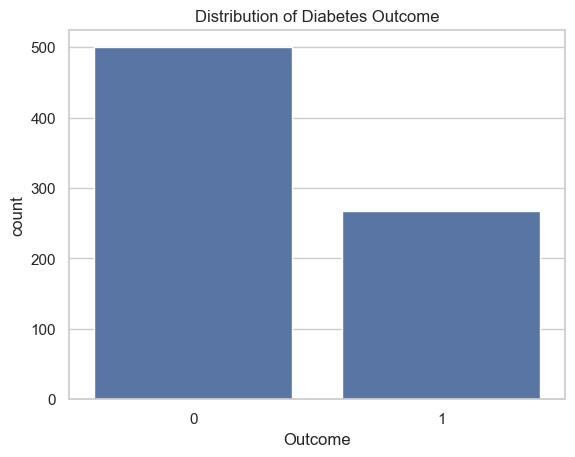

In [42]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Diabetes Outcome")
plt.show()

This helps us see class imbalance. Logistic regression models behave differently when one class dominates.

### 4.2 Histograms of key features
**Why this step matters**

Histograms give a quick pulse check on the dataset. They help us answer three essential questions:

1. Is the data symmetrical or skewed?
Skewed data often needs transformation or careful handling during modeling.

2. Are there impossible or suspicious values?
In medical datasets, zeros can be red flags. Nobody has 0 blood pressure.

3. Are there heavy outliers?
Outliers can distort training and lead to unstable predictions.

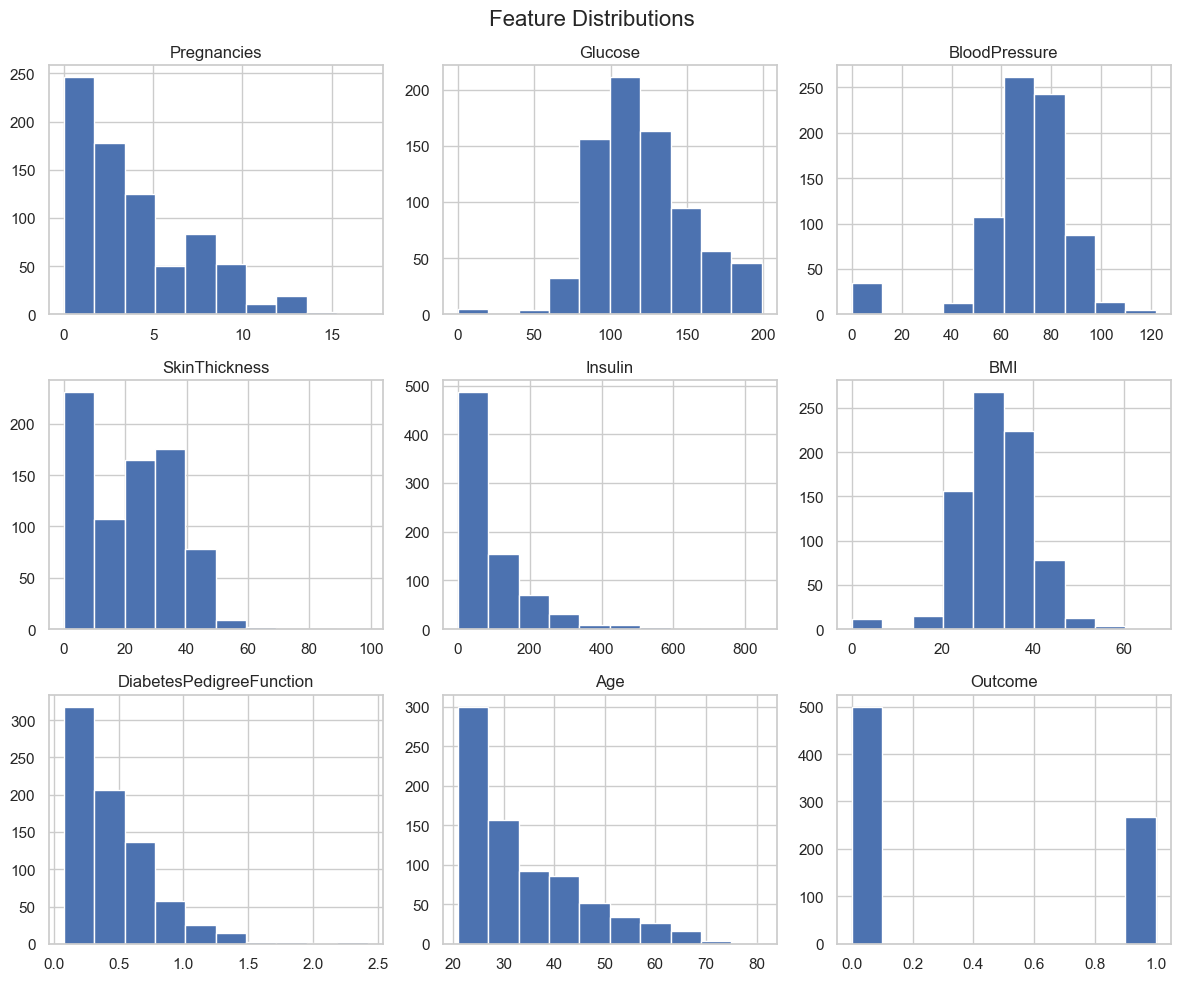

In [43]:
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

From this we see:
- Most women have between 0-5 pregnancies. A long tail stretches up to 17, indicating a few individuals with unusually high counts. Not harmful, just skewed.
- For Glucose, the distribution is roughly centered around 100-150, but there are several biologically impossible zeros, which likely repersent missing values recorded incorrectly.
- Blood pressure is mostly centered around 60-80 and contains some zeros which make no physiological sense.
- Skin thickness is highly skewed, lots of zeros, and a long right tail. The zeros are missing measurements.
- Insulin values are extremely skewed. The tall bar at zero is a giant hint that most insulin measurements weren’t taken. Values stretch up to 846, suggesting both missingness and outliers.
- For BMI, it displays a bell-shaped curve centered around 30ish. A few zeros exist, but they’re likely recording mistakes.
- Diabetes pedigree function is a measure of genetic risk. It’s naturally skewed, so it is not a problem. Most values cluster below 1 with some high outliers that represent strong family history.
- Age shows a tidy right-skewed distribution. Most patients are in their 20s–40s. Some patients are older, up to 80 years.
- Outcome, which is a binary distribution

### 4.3 Correlation Heatmap
Correlation helps you see:
- Which features relate strongly to the target
- Whether some features are redundant
- How linear models like logistic regression might behave

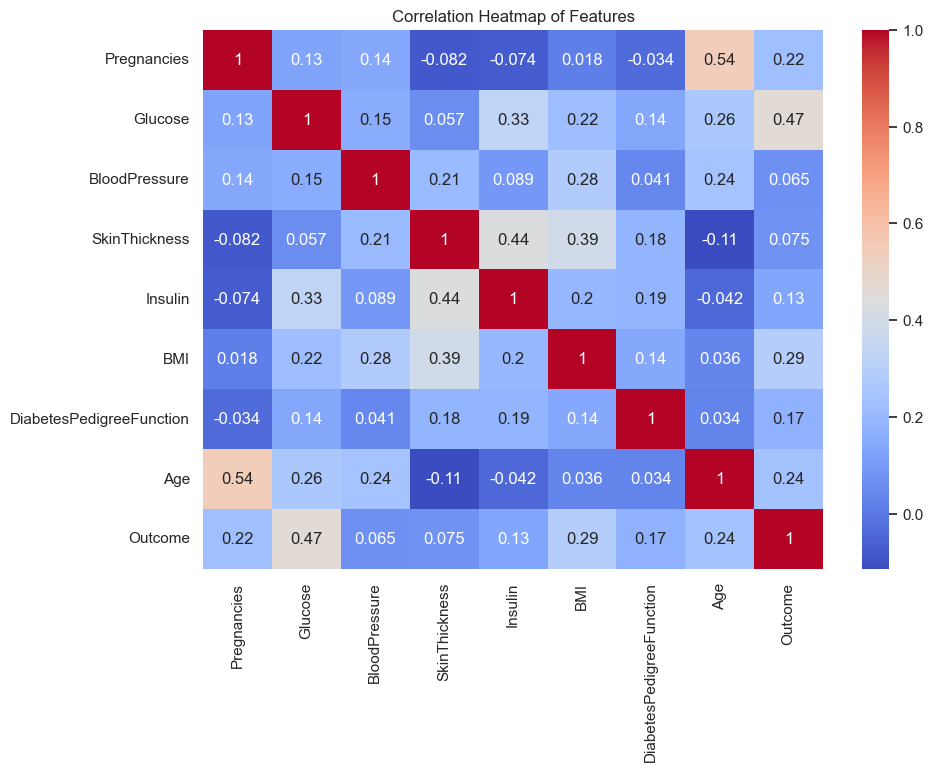

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

The correlation matrix offers a useful snapshot of how each feature relates to diabetes risk (Outcome). A few relationships stand out:

Glucose shows the strongest and most positive association with diabetes with a value of 0.47. This result aligns with medical knowledge because glucose levels are primarily used as a diagnostic criteria for diabetes. A strong association with the dependent variable reinforces glucose as an integral predictor for the model.

Body Mass Index (BMI) also shows a strong positive association with the result (≈0.29). Higher values of BMI are usually associated with an increase in insulin resistance. As a result, diabetes might occur. This suggests BMI provides additional metabolic information beyond glucose alone.

Both age and pregnancies demonstrate a moderate relationship with the result (about 0.24 and 0.22, respectively). Age captures an accumulated level of metabolism, while pregnancies might affect glucose metabolism for some women. Both factors provide some demographic background information which might help better explain the model result.

Overall, the heatmap suggests that the dataset contains a reasonable blend of metabolic, demographic, and physiological indicators. Glucose, BMI, Age, and Pregnancies appear to be the most influential predictors, while the remaining features may contribute supporting information in a non-linear modeling context.

## 5. Handling Incorrect Zero Values

Some clinical measurements cannot be zero.

Example: BMI = 0 is bioligically impossible.

In [45]:
# Columns where zero values are invalid and represent missing data
cols_with_invalid_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN so we can treat them as missing values
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)

# Impute missing values with median, because:
# - Median is robust to outliers
# - These features are often skewed
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].fillna(df[cols_with_invalid_zero].median())

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


We choose median instead of mean because clinical data is often skewed. Medians produce more stable imputations. It preserves the central tendency without pulling imputed values toward unrealistic extremes.

## 6. Splitting Data Into Train & Tests Sets
Why split?
We want the model to learn on one set and prove itself on unseen data.

20% is a common choice for balanced small datasets.

In [46]:
# Separating features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split: 80% training, 20% testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Feature Scaling


In [47]:
scaler = StandardScaler()

# Fit scaler only on training data to avoid leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression assumes features are on similar scales. If glucose ranges from 0-200 and insulin ranges from 0-800, the algorithm will be biased.

This is why we scale: 
- Scaling prevents dominance of large-range features
- It improves convergence
- It makes coefficients meaningful

We scale after splitting to avoid contaminating the test set with training statistics.

## 8. Training Logistic Regression

In [48]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300)

`max_iter=300` ensures the optimization algorithm has enough steps to converge. Logistic regression is a linear model that predicts the probability  of diabetes based on a weighted combination of features.

## 9. Model Evaluation

### 9.1 Predictions

In [49]:
y_pred = model.predict(X_test_scaled)

### 9.2 Accuracy

In [50]:
accuracy_score(y_test, y_pred)

0.7532467532467533

The logistic regression model achieved an accuracy of **approximately 75.3%** on the test set.

Accuracy measures the proportion of total predictions the model got right.

This means the model classifies about **3 out of every 4 patients** correctly as diabetic or non-diabetic.

However, the dataset is slightly imbalanced:

* **Outcome = 0:** 500 cases
* **Outcome = 1:** 268 cases

When classes are uneven, accuracy alone can be misleading. A model could lean toward predicting the majority class and still appear to perform “well.”

That’s why accuracy is useful as a quick check, but not a complete story.

### 9.3 Classification Report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



This model demonstrates strong performance on non-diabetic cases with **precision = 0.80** and a **recall value = 0.83**, implying a strong capability to predict negative instances. However, performance drops for diabetic cases, the **precision value = 0.67**, **recall value = 0.62**. This discrepancy suggests the model struggles to capture the subtler 
feature patterns associated with diabetes.  Because diabetes is the minority class, the model is slightly biased toward predicting the negative class.

In practical terms, the model is better at ruling out diabetes than detecting it. Improving recall for class 1 would make the model more clinically useful. Approaches such as feature scaling, regularization tuning, or switching to more expressive models (Random Forest, Gradient Boosting) often improve detection of the positive class.

### 9.4 Confusion Matrix

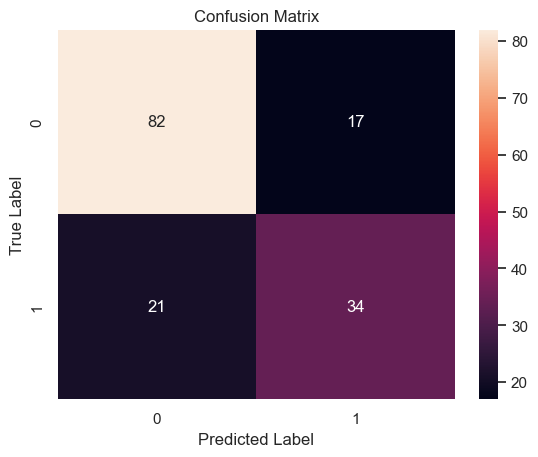

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix breaks down the model’s predictions into four categories, allowing us to see not just how many predictions were correct, but where the model makes mistakes.

From the matrix:

**True Negatives (82)**: These represent nondiabetic individuals who were appropriately identified as such. This indicates a strong ability in ruling out diabetes.

**False Positives (17)**: These are individuals who will be predicted to be suffering from diabetes whereas, actually they do not. In practice, this could lead to extra follow-up tests, although usually less risky than missing a real diabetic case.

**False Negatives (21)**: These are individuals with diabetes who were incorrectly diagnosed as non-diabetic. This is the gravest mistake in medical screening since it will miss a diagnosis.

**True Positives (34)**: These are people with diabetes who were correctly identified by the model. 

This shows that the model is biased toward classifying a patient as non-diabetic rather than diabetic. This corroborates earlier notes from the classification report, which showed that recall for class 0 outperformed recall for class 1. 

Although the overall accuracy is good, at around 75%, from the confusion matrix, an important limitation is that it misses 21 of the 55 diabetic patients, yielding a positive-class recall of about 62%.

Improving recall for diabetic cases would be essential if the model were used in a real-world healthcare setting.

### 9.5 ROC-AUC Score
AUC measures how well the model separates the two classes.

Closer to 1 = great performance.

In [53]:
roc_auc_score(y_test, y_pred)

np.float64(0.7232323232323232)

**An ROC-AUC score of 0.72 tells us that our model is reasonably good, but not spectacular, at ranking positives above negatives**. The range 0.7–0.8 indicates decent separation. 

So our model is saying:

“If I randomly pick one diabetic and one non-diabetic person, I’ll rank the diabetic higher about 72% of the time.”

### 9.6 ROC Curve (Receiver Operating Characteristic)

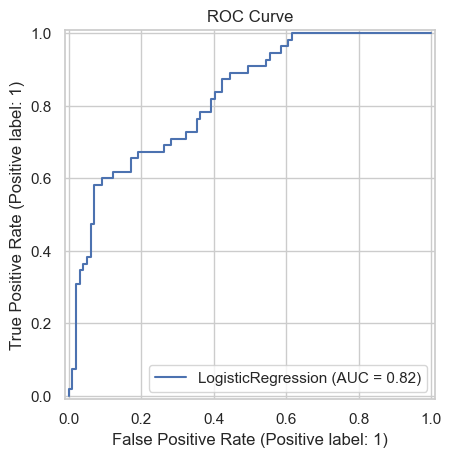

In [54]:
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

**An AUC ≈ 0.82 indicates that the model can correctly rank a random positive sample above a random negative sample 82% of the time**.

This means that the model has **good discriminative power**, even if precision/recall aren't perfect at the 0.5 threshold.

The ROC curve shows us that the model could do better on recall if we adjusted the threshold, at the cost of more false positives.

## 10. Coefficient Interpretation
Logistic Regression is more than a predictive tool; it is an interpretive tool as well.


In [55]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
1,Glucose,1.102682
5,BMI,0.688839
7,Age,0.392410
0,Pregnancies,0.222978
6,DiabetesPedigreeFunction,0.203635
3,SkinThickness,0.068836
4,Insulin,-0.138252
2,BloodPressure,-0.151540


The Logistic Regression models the log odds of the positive class (Outcome = 1) as a linear combination of input features.

In simple terms:

Positive Coefficient increases the chance of developing diabetes.

Negative Coefficient reduces risk of Diabetes.

The greater the absolute value, the stronger the impact on prediction.

Because we scaled our features, the coefficients are now comparable. This is very important. If we didn't scale our features, certain features would end up dominating simply because of the units, even though they might not be as important.

**The coefficient ranking shows us that the model:**

- Learns medically plausible relationships

- Prioritizes metabolic indicators over secondary signals

- Balances interpretability with predictive performance

Most importantly, it demonstrates that the model is not guessing but learning meaningful structure from the data.

## 11. Conclusion

This project demonstrated how logistic regression can be used as a practical and interpretable baseline model for predicting diabetes. After exploring the data, handling feature distributions, and evaluating class balance, the model achieved solid performance, with an accuracy of about 75% and an AUC of 0.82, indicating good discriminatory ability between diabetic and non-diabetic cases.

Glucose emerged as the most influential predictor, followed by BMI and age, which aligns well with established medical understanding of diabetes risk factors. Other features such as pregnancies and diabetes pedigree function contributed moderately, while insulin and blood pressure showed weaker effects, likely influenced by data sparsity and feature correlations rather than true clinical insignificance.

Despite its simplicity, the model provides meaningful insights and serves as a strong foundation for more advanced work. Future improvements could include better handling of zero-inflated features, feature scaling and selection, hyperparameter tuning, and experimenting with more complex models such as Random Forests, Gradient Boosting, or XGBoost. Overall, this project highlights the value of combining exploratory analysis, interpretability, and evaluation metrics to build trustworthy machine learning models in healthcare contexts.
